In [166]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from seaborn import pairplot 
from seaborn import boxplot
from seaborn import countplot
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

plt.style.use('belle2')


# Define Logistic regression class

In [239]:
def logistic_fun(X,y,theta, MSE = False):
    n = X.shape[0]

    X =np.column_stack([np.ones((n,1)),X])
    xth_y = (X.dot(theta))

    htheta = (1+ math.e**(-xth_y))**(-1)
    cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

    return htheta, cost
    

In [191]:
class Logistic_regression: 
    def __init__(self, learning_rate=0.01, iterations=1000, MSE = False):
        self.learning_rate, self.iterations, self.MSE = learning_rate, iterations, MSE
        

    def logistic_fun(self,X,y,theta, MSE = False):
        n = X.shape[0]
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(theta))

        htheta = (1+ math.e**(-xth_y))**(-1)
        cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()
    
        #htheta = (1+ math.e**(-xth_y))**(-1)
        #cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

        if MSE:
            htheta = (1+ math.e**(-xth_y))**(-1)
            cost = (2*n)**(-1) *((htheta-y)**2).sum()   

        grad =    1/n * (htheta-y).dot(X)
        return htheta, cost, grad

    def fit(self, X, y):
        theta = np.full((X.shape[1]+1,),0.01)
        costlist = []
        nitlist = []
        
        for nit in range(self.iterations):
            htheta, cost, grad = self.logistic_fun(X, y, theta, self.MSE)
            theta = theta - self.learning_rate * grad
            if nit % 10 == 0:
                nitlist.append(nit)
                costlist.append(cost)
                
        plt.plot(np.array(nitlist),np.array(costlist),marker='o')
        plt.xlabel('number of iteration')
        plt.ylabel('Cost')
        plt.show()

        self.theta = theta

    def predict(self, X):
        n = X.shape[0]
        
        X =np.column_stack([np.ones((n,1)),X])
        xth_y = (X.dot(self.theta))
        htheta = (1+ math.e**(-xth_y))**(-1)
        

        
        return htheta
    
    

# Credit card dataset
 Here https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default
 
 On this R-data statistics page, you will find information about the Default data set which pertains to Credit Card Default Data. The Default data set is found in the ISLR R package. You can load the Default data set in R by issuing the following command at the console data("Default"). This will load the data into a variable called Default. If R says the Default data set is not found, you can try installing the package by issuing this command install.packages("ISLR") and then attempt to reload the data. If you need to download R, you can go to the R project website. You can download a CSV (comma separated values) version of the Default R data set. The size of this file is about 433,674 bytes.

In [168]:
df = pd.read_csv('dataset-63314.csv')
# creating number target variable
codes = {'Yes':0,'No':1}
df['target'] = df['default'].map(codes)
df['isstudent'] = df['student'].map(codes)
df.head(5)

,default,student,balance,income,target,isstudent
0,No,No,729.526495,44361.625074,1,1
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,1,1
3,No,No,529.250605,35704.493935,1,1
4,No,No,785.655883,38463.495879,1,1


## Checking and plotting the dataset

Source: here (https://towardsdatascience.com/practical-guide-to-data-visualization-83e375b0037)

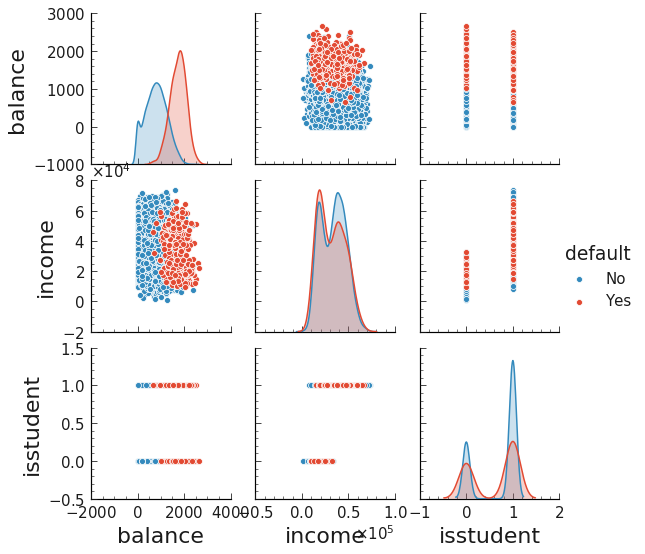

In [46]:
# plotting correlation
pairplot(df.drop(columns = ['target']),hue='default')
plt.show()

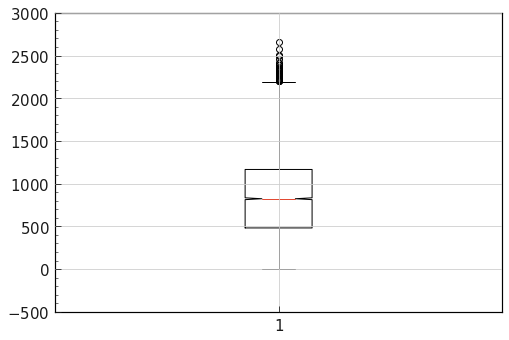

In [47]:
plt.boxplot(df['balance'],#patch_artist = True,
                notch ='True', vert = 1)
plt.grid()
plt.show()

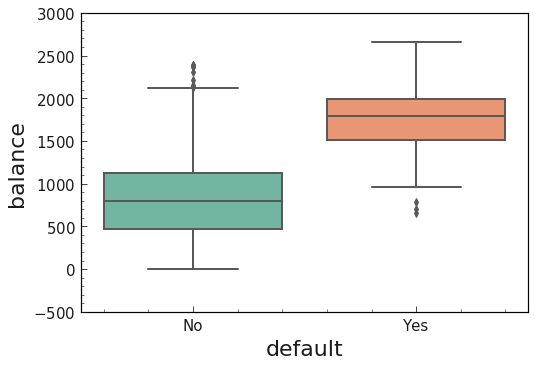

In [48]:
boxplot (x= 'default', y= 'balance', data =df, linewidth=2,palette= 'Set2');

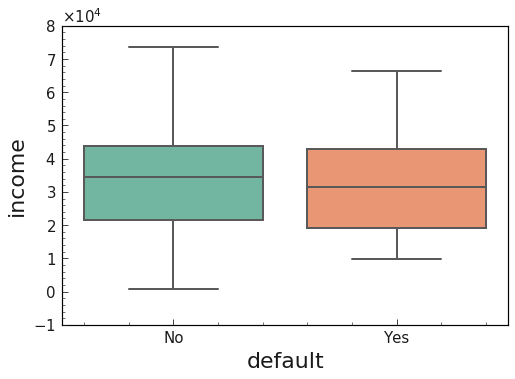

In [49]:
boxplot (x= 'default', y= 'income', data =df, linewidth=2,palette= 'Set2');

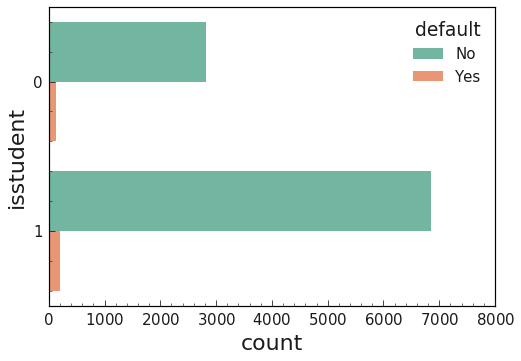

In [50]:
countplot (y= 'isstudent', hue= 'default', data =df, palette= 'Set2');

## plot cost function

In [169]:
df = df.drop(columns=['default','student','isstudent']).copy()


x = df[['balance','income']].copy()
y  = df['target'].to_numpy()

scaler = StandardScaler()
scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))
dfprime = pd.concat([df,x],axis=1)

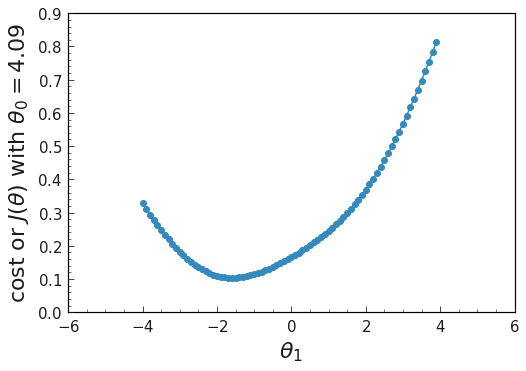

In [170]:

thetath = np.arange(-4,4,0.1)
theta1cost = []
for ii in thetath:
    theta= np.array([ 4.09,ii, -1])
    theta1cost.append(logistic_fun(x,y,theta)[1])
plt.plot(thetath,np.array(theta1cost),marker='o')
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'cost or $J(\theta)$ with $\theta_{0}=4.09$')
#plt.savefig('credit_th1.png')
plt.show()

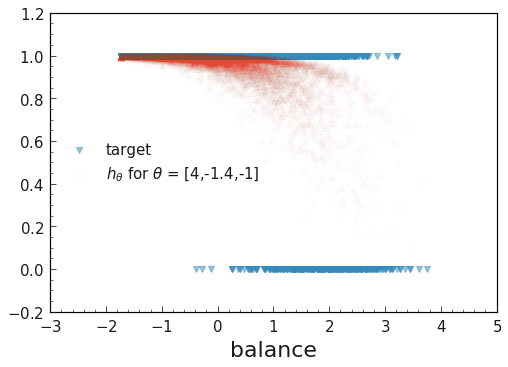

In [65]:
theta= np.array([ 4.09,-1.4, -1])
htheta,cost = logistic_fun(x,y,theta)

#plotting htheta
plt.scatter(x[0], y, marker='v',alpha = 0.5, label='target')
plt.scatter(x[0], htheta, marker='^',alpha = 0.01, label=r'$h_{\theta}$ for $\theta$ = [4,-1.4,-1]')
plt.xlabel('balance')
plt.legend()
plt.show()

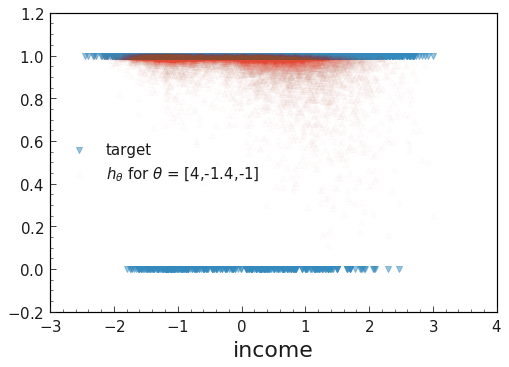

In [66]:
theta= np.array([ 4.09,-1.4, -1])
htheta,cost = logistic_fun(x,y,theta)

#plotting htheta
plt.scatter(x[1], y, marker='v',alpha = 0.5, label='target')
plt.scatter(x[1], htheta, marker='^',alpha = 0.01, label=r'$h_{\theta}$ for $\theta$ = [4,-1.4,-1]')
plt.xlabel('income')
plt.legend()
plt.show()

## Fit with logistic refgression with only balance and income

### train test split

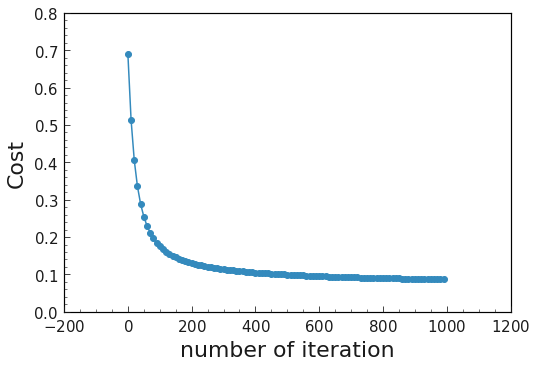

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:

clf = Logistic_regression( learning_rate=0.1, iterations=1000,)
clf.fit(x_train, y_train)

## accuracy

In [94]:
y_pred = clf.predict(x_train)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_train, y_pred)

0.9702352941176471

In [98]:
y_pred = clf.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_test, y_pred)

0.9633333333333334

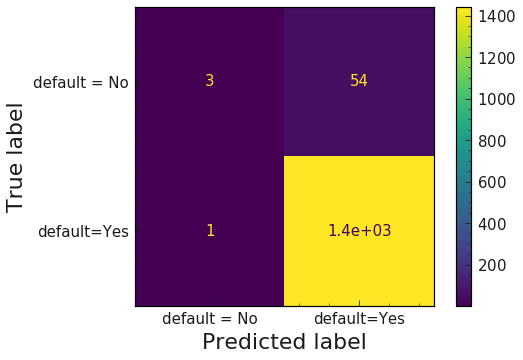

In [99]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
        
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['default = No','default=Yes'])
disp.plot()
plt.show()

## roc

# IRIS dataset

In [329]:
from sklearn import datasets
iris = datasets.load_iris()

In [330]:
x  = iris['data']
y = iris['target']
#scaler = StandardScaler()
#scaler.fit(x)

In [331]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

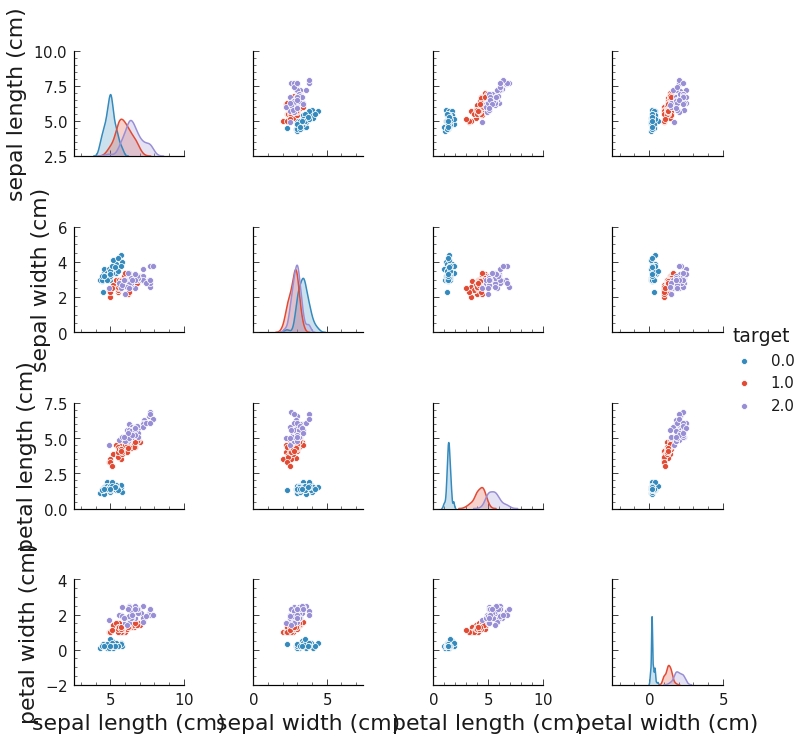

In [332]:
n = y.shape[0]
df = pd.DataFrame(np.hstack([x,y.reshape((n,1))]), columns =['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)', 'target'] )
df
pairplot(df,hue='target')
plt.show()

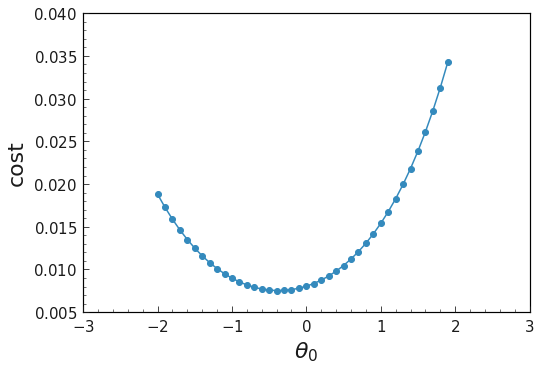

In [333]:
def logistic_fun(X,y,theta, MSE = False):
    n = X.shape[0]

    X =np.column_stack([np.ones((n,1)),X])
    xth_y = (X.dot(theta))

    htheta = (1+ math.e**(-xth_y))**(-1)
    cost = -1/n * (np.log(htheta)*y+(1-y)*np.log(1-htheta)).sum()

    return htheta, cost
    
thetath = np.arange(-2,2,0.1)
theta1cost = []
for ii in thetath:
    theta= np.array([ii, -0.52066744, -1.81909428, 2.8,  1.27296543])
    y[y == 2] = 1
    theta1cost.append(logistic_fun(x,y,theta)[1])
plt.plot(thetath,np.array(theta1cost),marker='o')
plt.xlabel(r'$\theta_{0}$')
plt.ylabel('cost')
#plt.savefig('credit_th1.png')
plt.show()

## fit (setosa vs. All) with first two features

In [343]:
x = np.vstack((x.T[0],x.T[1])).T

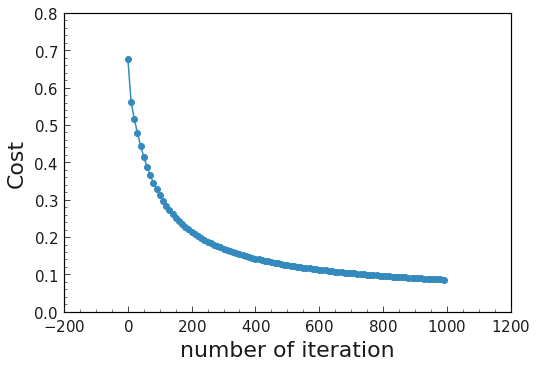

In [344]:
y[y == 2]  = 1

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

clf = Logistic_regression(learning_rate=0.1, iterations=1000)
clf.fit(x_train, y_train)

In [345]:
clf.theta

array([-0.80599954,  2.94551652, -4.77832469])

## accuracy

In [346]:
y_pred = clf.predict(x_train)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_train, y_pred)

0.9921259842519685

In [347]:
y_pred = clf.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
accuracy_score(y_test, y_pred)

1.0

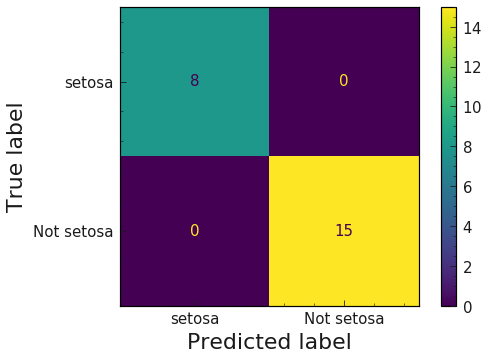

In [348]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
        
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa','Not setosa'])
disp.plot()
plt.show()

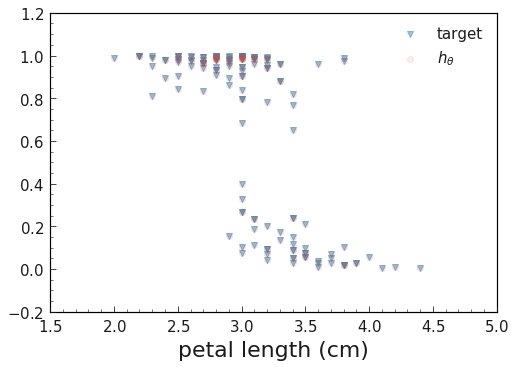

In [358]:


theta= clf.theta
htheta,cost = logistic_fun(x,y,theta)

y_pred = clf.predict(x)

#plotting htheta
plt.scatter(x.T[1], y_pred, marker='v',alpha = 0.5, label='target')
plt.scatter(x.T[1], htheta, marker='o',alpha = 0.1, label=r'$h_{\theta}$')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()

## decision boundary

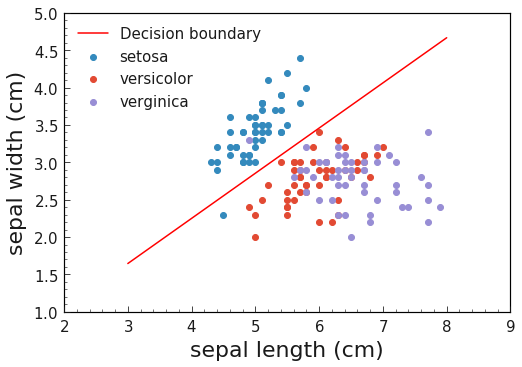

In [359]:
plt.scatter(df.query('target==0')['sepal length (cm)'],df.query('target==0')['sepal width (cm)'], label = 'setosa' )
plt.scatter(df.query('target==1')['sepal length (cm)'],df.query('target==1')['sepal width (cm)'], label = 'versicolor')
plt.scatter(df.query('target==2')['sepal length (cm)'],df.query('target==1')['sepal width (cm)'], label = 'verginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


xline = np.linspace(3,8,100)

## find the st line eqn from the theta values
yline = (2.9/4.8)*xline+(-0.8/4.8)
plt.plot(xline, yline, '-r',label='Decision boundary')
plt.legend()
plt.show()